In [1]:
from os import walk
import re
from os.path import join, split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from os import makedirs

import geopandas as gpd
import geoplot as gplt
from scipy.stats import ttest_ind

import matplotlib as mpl
mpl.rcParams["font.size"] = 14
from utils.metrics import *
# from MES_LSTM.utils import metrics_01

In [2]:
sadc = ['Angola', 'Botswana', 'Comoros', 'Democratic_Republic_of_Congo',
        'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
        'Namibia', 'South_Africa', 'Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']
alphas = [0.05, 0.1, 0.2]
files = []

for alpha in alphas:
    for country in sadc:
        data_path = country + '/' + str(alpha) + '/results/'

        for (dirpath, _, filenames) in walk(data_path):
            files += [join(dirpath, file) for file in filenames]
            break

# files

In [3]:
decimals = 4

# all trials for all countries
regexs = ['.*cases*', '.*deaths*']
for regex in regexs:
    r = re.compile(regex)
    files_filter = list(filter(r.match, files))
    for alpha in alphas:
        r = re.compile('.*/' + str(alpha) + '/*')
        files_filter_ = list(filter(r.match, files_filter))
        vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])] = {}
        for file in files_filter_:
            vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])][file.split('/')[0]] = pd.read_pickle(file).round(decimals = decimals)
        

In [4]:
%whos dict

Variable            Type    Data/Info
-------------------------------------
cases_results_05    dict    n=16
cases_results_1     dict    n=16
cases_results_2     dict    n=16
deaths_results_05   dict    n=16
deaths_results_1    dict    n=16
deaths_results_2    dict    n=16


In [5]:
tab_path = 'tables/'
makedirs(tab_path, exist_ok = True)

# forecast performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_forecast.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_forecast.xlsx')

In [6]:
# statistical significance tests RSA MIS
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['mis_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['mis_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_mis.xlsx')

# statistical significance tests RSA sMAPE
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['smape_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['smape_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_smape.xlsx')

# statistical significance tests RSA Coverage
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_2['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['cov_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_2['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['cov_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_cov.xlsx')

# statistical significance tests RSA RMSE
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_2['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['rmse_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
#     print(col)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_2['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['rmse_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_rmse.xlsx')

In [40]:
# Diebold-Marino
files_01 = []
for (dirpath, _, filenames) in walk(join('South_Africa', str(alphas[-1]), 'results')):
    files_01 += [join(dirpath, file) for file in filenames]
# print(files_01)
regex = '.*/forecast.pkl'
# for regex in regexs:
r = re.compile(regex)
files_01 = list(filter(r.match, files_01))
# print(files_01)
dm_dict = {}
for file in files_01:
    dm_dict[file.split('/')[-2]] = pd.read_pickle(file).round(decimals = decimals)

dm_results = pd.DataFrame(index = ['statistic', 'p_value'])
dm_results

for key in [key for key in dm_dict.keys() if not key.startswith("mes_")]:
    dm_results['deaths_' + key] = diebold_mariano_test(dm_dict['mes_lstm']['total_deaths_true'], dm_dict['mes_lstm']['total_deaths_pred'], dm_dict[key]['total_deaths_pred'])
    
for key in [key for key in dm_dict.keys() if not key.startswith("mes_")]:
    dm_results['cases_' + key] =  diebold_mariano_test(dm_dict['mes_lstm']['total_cases_true'], dm_dict['mes_lstm']['total_cases_pred'], dm_dict[key]['total_cases_pred'])

dm_results.round(decimals = decimals).to_excel(tab_path + 'dm_test.xlsx')
dm_results

,deaths_sarimax,deaths_varmax,deaths_mlr,deaths_pure_lstm,cases_sarimax,cases_varmax,cases_mlr,cases_pure_lstm
statistic,-1.160414e+01,-1.199303e+01,-1.392732e+01,-1.234625e+01,-1.116625e+01,-5.097781,-8.832644e+00,-0.789156
p_value,8.530394e-16,2.516401e-16,7.740716e-19,8.444312e-17,3.451960e-15,0.000005,8.816545e-12,0.433747


In [8]:
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.0000,35.0000,35.0000
mean,1.431183,1291.495877,10.749157,10607.594877,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582
std,0.326883,292.565874,6.744892,6853.286441,7.209162e-15,7.382182e-12,3.604581e-15,0.0000,0.0000,0.0000
min,0.610500,563.845700,1.305600,1338.404300,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582
25%,1.203000,1086.400500,4.567500,4473.147100,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582
50%,1.439100,1297.679900,8.769500,7864.268300,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582
75%,1.648350,1485.639150,15.939650,15824.982750,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582
max,2.008300,1810.488300,24.135100,24829.853700,1.244120e+01,1.270019e+04,5.947100e+00,5733.3401,7.0805,6770.0582


In [9]:
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').head()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
1,1.7542,51786.5349,12.4802,345696.4834,2.4849,86685.2769,4.2678,126277.1616,3.6236,108972.9782
2,1.4994,44261.1943,7.4666,233228.6072,2.4849,86685.2769,4.2678,126277.1616,3.6236,108972.9782
3,1.1709,34588.1775,1.2506,44577.7121,2.4849,86685.2769,4.2678,126277.1616,3.6236,108972.9782
4,2.2633,66931.1074,7.2107,203538.4311,2.4849,86685.2769,4.2678,126277.1616,3.6236,108972.9782
5,1.9535,57708.6523,3.5716,118280.9080,2.4849,86685.2769,4.2678,126277.1616,3.6236,108972.9782


In [10]:
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').head()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
1,1.4391,1297.6799,7.8457,7864.2683,12.4412,12700.1867,5.9471,5733.3401,7.0805,6770.0582
2,1.2739,1149.7189,16.0968,15968.7112,12.4412,12700.1867,5.9471,5733.3401,7.0805,6770.0582
3,0.9622,872.3278,4.5977,4550.8985,12.4412,12700.1867,5.9471,5733.3401,7.0805,6770.0582
4,1.9786,1783.4030,6.5080,5999.3876,12.4412,12700.1867,5.9471,5733.3401,7.0805,6770.0582
5,1.6886,1521.8218,15.2992,14945.4095,12.4412,12700.1867,5.9471,5733.3401,7.0805,6770.0582


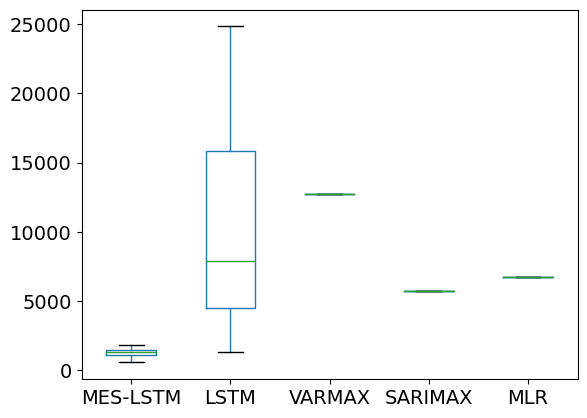

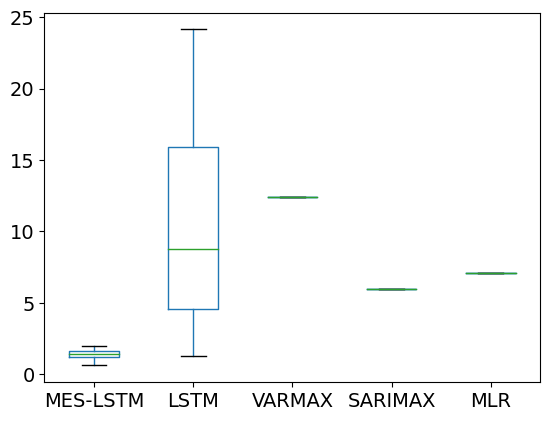

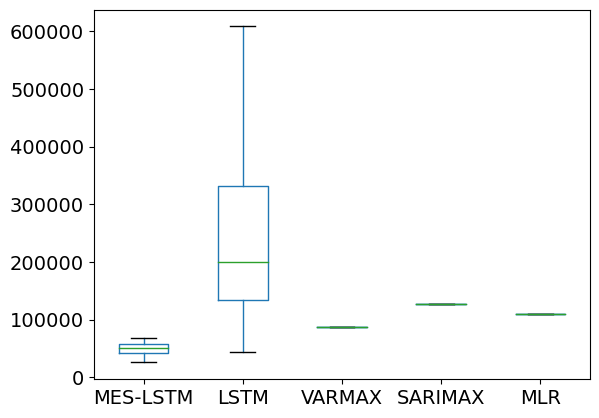

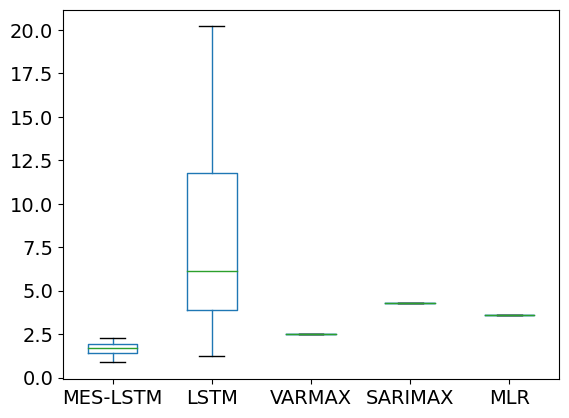

In [11]:
save_path = 'figures/'
makedirs(save_path, exist_ok = True)
drop_col = ['MES-LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR']
rename_col = ['MES-LSTM']

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(rmse)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
# sub_axes = plt.axes([.6, .6, .25, .25])
# sub_axes.plot() #zoom in
# deaths_results_1['South_Africa'].filter(regex = r'(rmse_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'deaths_rmse_box.pdf', dpi = 600)
plt.show()

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(smape)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
# sub_axes = plt.axes([.6, .6, .25, .25])
# sub_axes.plot() #zoom in
# deaths_results_1['South_Africa'].filter(regex = r'(smape_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'deaths_smape_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
# plt.gcf().subplots_adjust(left=0.15)
cases_results_1['South_Africa'].filter(regex = r'(rmse)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
# sub_axes = plt.axes([.6, .6, .25, .25])
# sub_axes.plot() #zoom in
# cases_results_1['South_Africa'].filter(regex = r'(rmse_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'cases_rmse_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
cases_results_1['South_Africa'].filter(regex = r'(smape)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
# sub_axes = plt.axes([.6, .6, .25, .25])
# sub_axes.plot() #zoom in
# cases_results_1['South_Africa'].filter(regex = r'(smape_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'cases_smape_box.pdf', dpi = 600)
plt.show()

In [12]:
# PI performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_1.xlsx')
cases_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_05.xlsx')
cases_results_2['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_2.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_1.xlsx')
deaths_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_05.xlsx')
deaths_results_2['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_2.xlsx')

In [13]:
cases_results_2['South_Africa'].filter(regex = r'(mis|cov)').describe()

,mis_meslstm,cov_meslstm,mis_lstm,cov_lstm,mis_varmax,cov_varmax,mis_sarimax,cov_sarimax,mis_mlr,cov_mlr
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,35.0,3.500000e+01,35.0,3.500000e+01,35.0
mean,211201.672034,52.717089,3.264153e+06,86.498600,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0
std,104303.791720,47.768983,7.329922e+05,28.149667,1.181149e-10,0.0,4.724596e-10,0.0,3.543447e-10,0.0
min,91684.865200,0.000000,2.628258e+06,0.000000,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0
25%,114647.022150,0.000000,2.776395e+06,90.196100,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0
50%,187076.544900,74.509800,3.008360e+06,100.000000,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0
75%,278398.794400,100.000000,3.394189e+06,100.000000,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0
max,513974.273300,100.000000,6.205633e+06,100.000000,3.596011e+05,100.0,4.875354e+05,100.0,4.969066e+05,100.0


In [14]:
# accuracy for all countries (averaged trials)
cases_acc_2 = pd.DataFrame(columns = cases_results_2[list(cases_results_2.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_2 = pd.DataFrame(columns = deaths_results_2[list(deaths_results_2.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_05 = pd.DataFrame(columns = cases_results_05[list(cases_results_05.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_05 = pd.DataFrame(columns = deaths_results_05[list(deaths_results_05.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_1 = pd.DataFrame(columns = cases_results_1[list(cases_results_1.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_1 = pd.DataFrame(columns = deaths_results_1[list(deaths_results_1.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize

for key in list(deaths_results_1.keys()): # for each country
    cases_acc_2.loc[key] = cases_results_2[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_2.loc[key] = deaths_results_2[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_05.loc[key] = cases_results_05[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_05.loc[key] = deaths_results_05[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_1.loc[key] = cases_results_1[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_1.loc[key] = deaths_results_1[key].mean(axis = 0).round(decimals = decimals)

In [15]:
# forecasts all countries
cases_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_cases_forecast.xlsx')
deaths_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_deaths_forecast.xlsx')

# PI all counries
cases_acc_2.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_2.xlsx')
cases_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_05.xlsx')
cases_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_1.xlsx')
deaths_acc_2.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_2.xlsx')
deaths_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_05.xlsx')
deaths_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_1.xlsx')

In [16]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
cases_acc_05    DataFrame                             <...>   267989.2482      0.0  
cases_acc_1     DataFrame                             <...>   170114.0697      0.0  
cases_acc_2     DataFrame                             <...>    106563.744      0.0  
deaths_acc_05   DataFrame                             <...>      2156.475      0.0  
deaths_acc_1    DataFrame                             <...>     1233.4702      0.0  
deaths_acc_2    DataFrame                             <...>      709.1658      0.0  
dm_results      DataFrame               deaths_sarimax<...>45e-12         0.433747  
sig             DataFrame              cases_rmse_lstm<...>value               0.0  


In [17]:
# accuracy for all sadc (averaged trials, avergaed countries) for bar plots

cases_sadc_2 = cases_acc_2.mean(axis = 0).round(decimals = decimals)
deaths_sadc_2 = deaths_acc_2.mean(axis = 0).round(decimals = decimals)
cases_sadc_05 = cases_acc_05.mean(axis = 0).round(decimals = decimals)
deaths_sadc_05 = deaths_acc_05.mean(axis = 0).round(decimals = decimals)
cases_sadc_1 = cases_acc_1.mean(axis = 0).round(decimals = decimals)
deaths_sadc_1 = deaths_acc_1.mean(axis = 0).round(decimals = decimals)

### South Africa

In [18]:
objects = ('MES-LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.85

### SMAPE

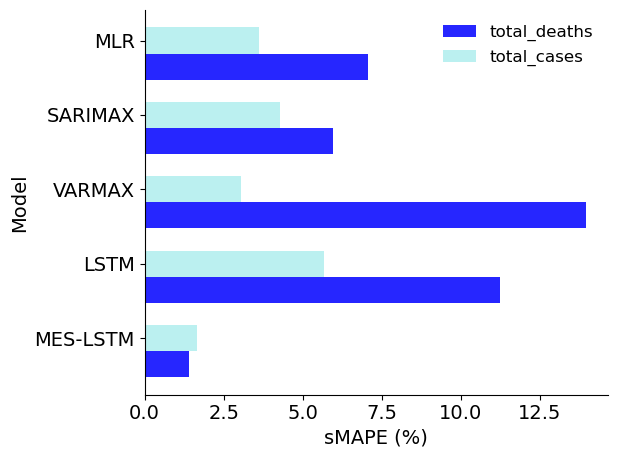

In [19]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
legend_loc = 0
legend_font = 12

total_cases_2 = cases_acc_2.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'smape_sa.pdf', dpi = 600)
plt.show()


### RMSE

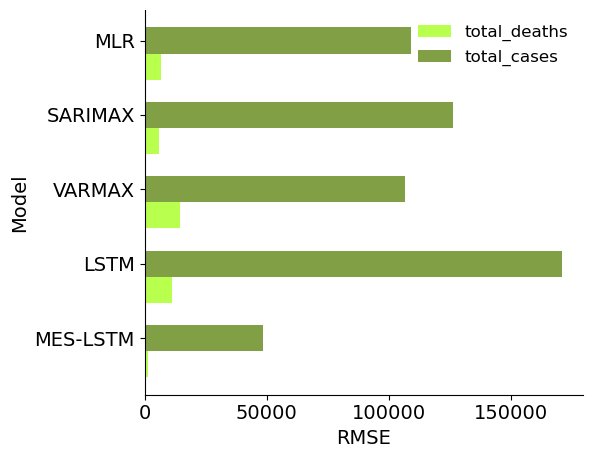

In [20]:
total_cases_2 = cases_acc_2.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sa.pdf', dpi = 600)
plt.show()

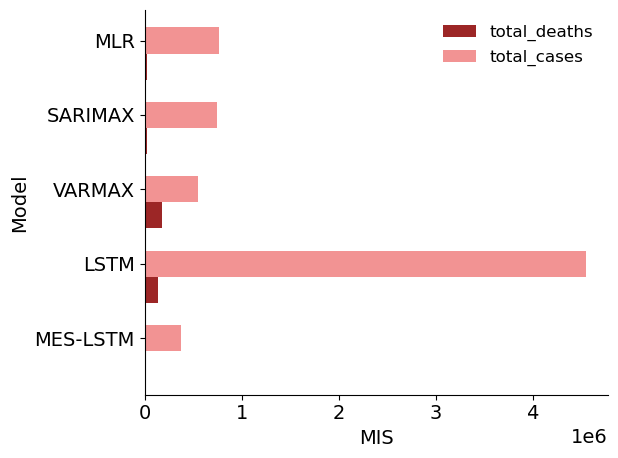

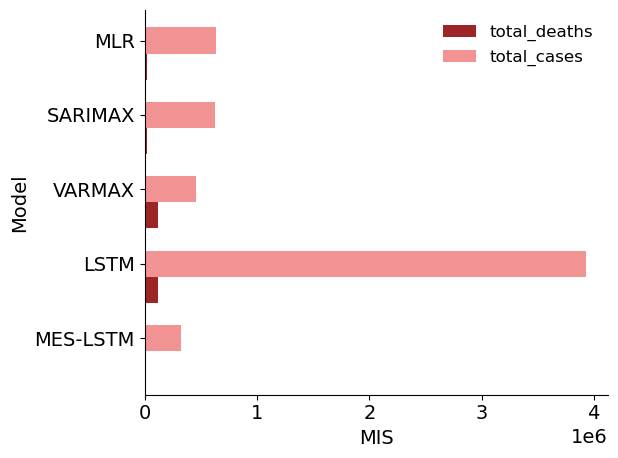

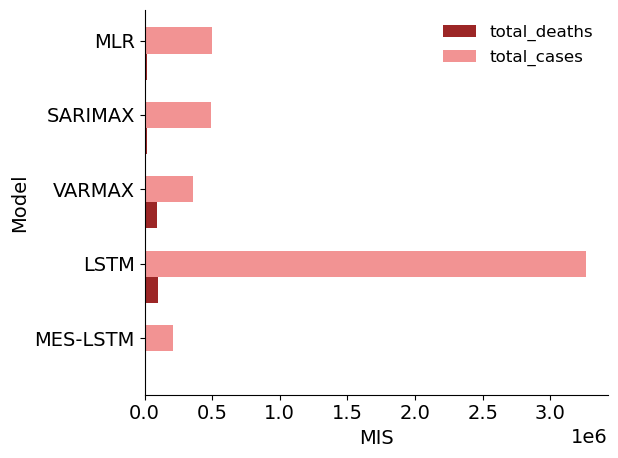

In [21]:
total_cases_2 = cases_acc_2.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_2.pdf', dpi = 600)
plt.show()

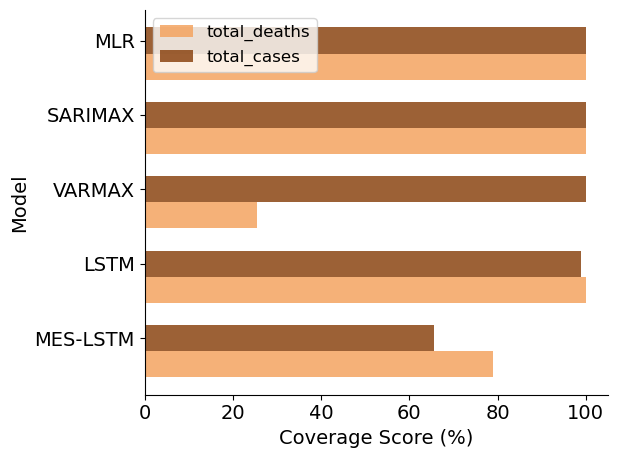

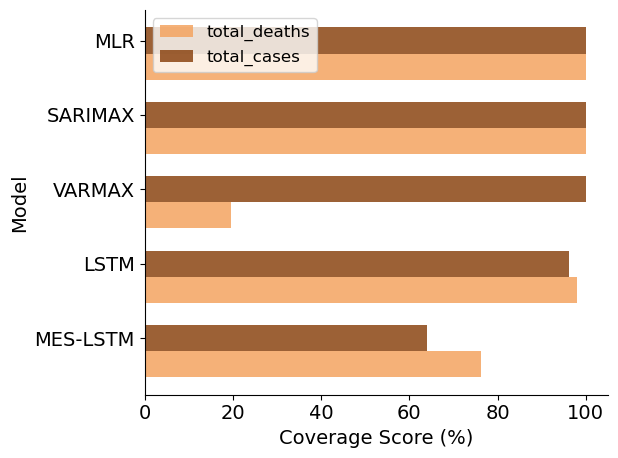

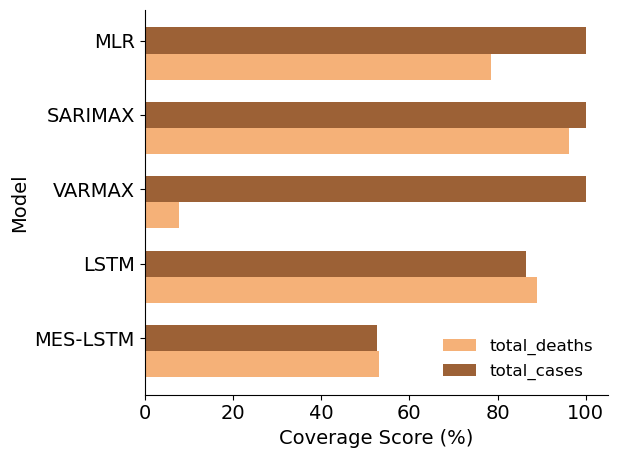

In [22]:
total_cases_2 = cases_acc_2.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 2, frameon = True, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 2, frameon = True, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_2.pdf', dpi = 600)
plt.show()

### SADC

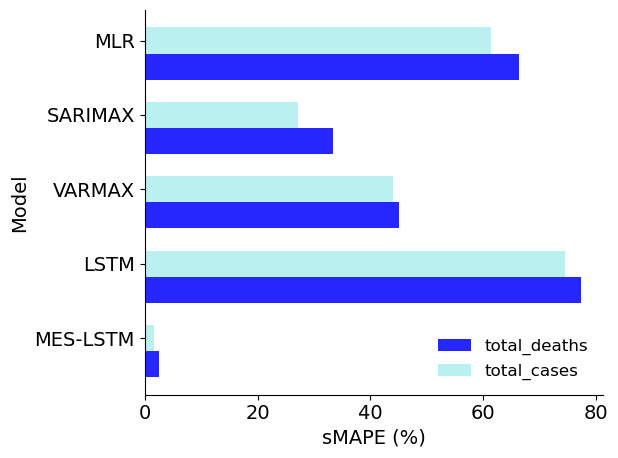

In [23]:
total_cases_2 = cases_sadc_2.filter(like = 'smape').values
total_deaths_2 = deaths_sadc_2.filter(like = 'smape').values

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)

plt.tight_layout()
plt.savefig(save_path + 'smape_sadc.pdf', dpi = 600)
plt.show()

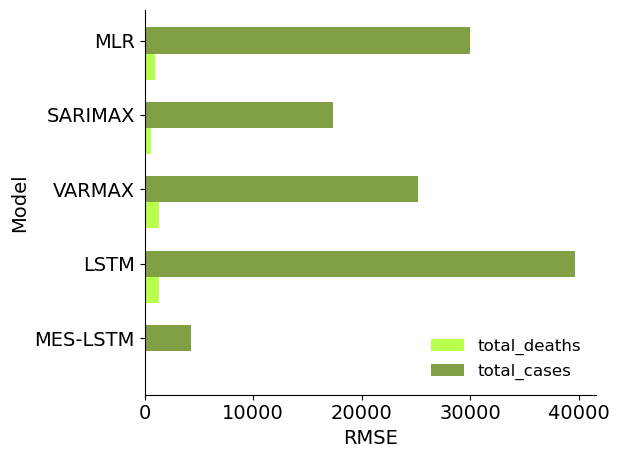

In [24]:
total_cases_2 = cases_sadc_2.filter(like = 'rmse').values
total_deaths_2 = deaths_sadc_2.filter(like = 'rmse').values


fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sadc.pdf', dpi = 600)
plt.show()

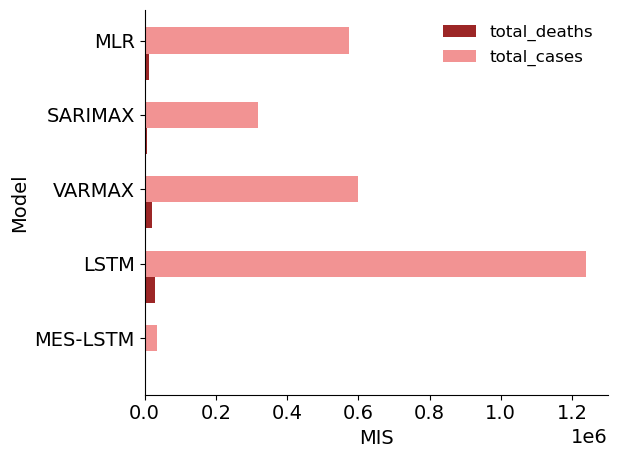

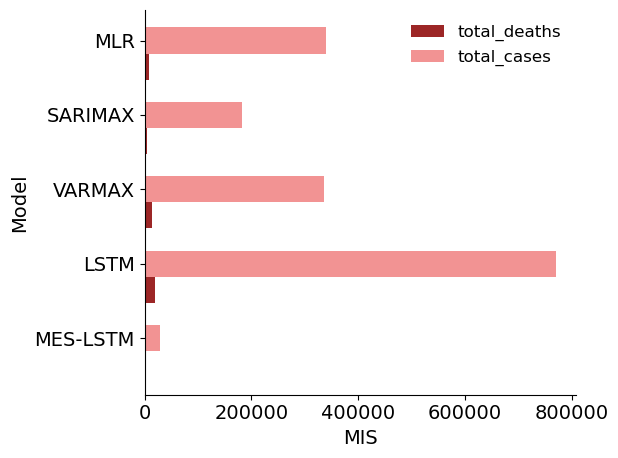

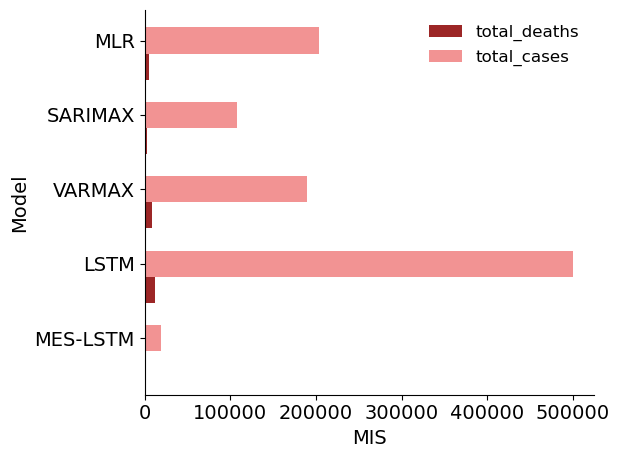

In [25]:
total_cases_2 = cases_sadc_2.filter(like = 'mis').values
total_deaths_2 = deaths_sadc_2.filter(like = 'mis').values
total_cases_05 = cases_sadc_05.filter(like = 'mis').values
total_deaths_05 = deaths_sadc_05.filter(like = 'mis').values
total_cases_1 = cases_sadc_1.filter(like = 'mis').values
total_deaths_1 = deaths_sadc_1.filter(like = 'mis').values

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_2.pdf', dpi = 600)
plt.show()

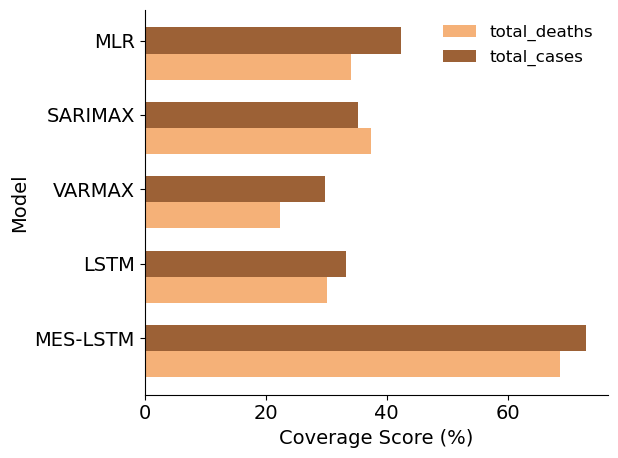

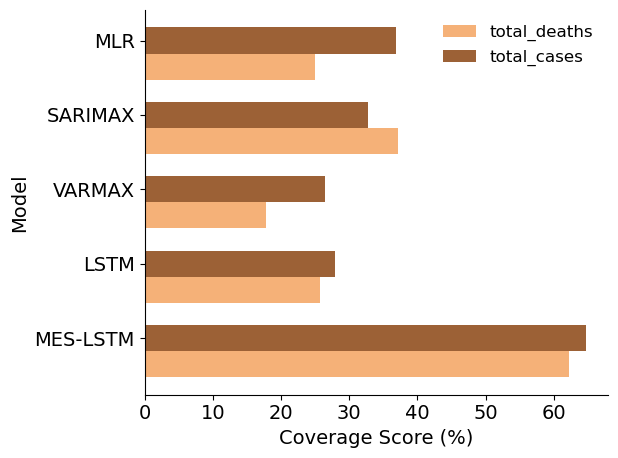

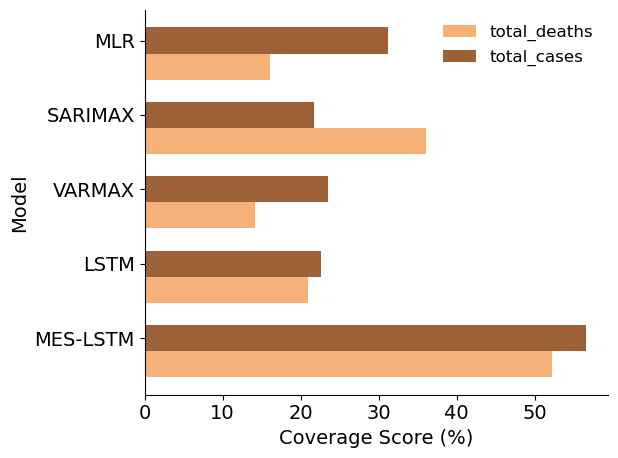

In [26]:
total_cases_2 = cases_sadc_2.filter(like = 'cov').values
total_deaths_2 = deaths_sadc_2.filter(like = 'cov').values
total_cases_05 = cases_sadc_05.filter(like = 'cov').values
total_deaths_05 = deaths_sadc_05.filter(like = 'cov').values
total_cases_1 = cases_sadc_1.filter(like = 'cov').values
total_deaths_1 = deaths_sadc_1.filter(like = 'cov').values

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font) #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_2.pdf', dpi = 600)
plt.show()

### MAPS

In [27]:
sadc_map = ['Angola', 'Botswana', 'Comoros', 'Democratic Republic of the Congo', 'Swaziland',
            'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'South Africa',
            'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']

In [28]:
cases_smape_2 = cases_acc_2.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_05 = cases_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_1 = cases_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_2 = deaths_acc_2.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_05 = deaths_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_1 = deaths_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_mis_2 = cases_acc_2.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_05 = cases_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_1 = cases_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_2 = deaths_acc_2.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_05 = deaths_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_1 = deaths_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_cov_2 = cases_acc_2.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_05 = cases_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_1 = cases_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]

deaths_cov_2 = deaths_acc_2.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_05 = deaths_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_1 = deaths_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]


In [29]:
maps = pd.DataFrame(columns = ['country',
                               'cases_smape_2', 'cases_smape_05', 'cases_smape_1',
                               'cases_mis_2', 'cases_mis_05', 'cases_mis_1',
                               'deaths_smape_2', 'deaths_smape_05', 'deaths_smape_1',
                               'deaths_mis_2', 'deaths_mis_05', 'deaths_mis_1'])
maps['country'] = sadc_map
maps['cases_smape_2'], maps['cases_smape_05'], maps['cases_smape_1'] = cases_smape_2, cases_smape_05, cases_smape_1
maps['cases_mis_2'], maps['cases_mis_05'], maps['cases_mis_1'] = cases_mis_2, cases_mis_05, cases_mis_1
maps['cases_cov_2'], maps['cases_cov_05'], maps['cases_cov_1'] = cases_cov_2, cases_cov_05, cases_cov_1
maps['deaths_smape_2'], maps['deaths_smape_05'], maps['deaths_smape_1'] = deaths_smape_2, deaths_smape_05, deaths_smape_1
maps['deaths_mis_2'], maps['deaths_mis_05'], maps['deaths_mis_1'] = deaths_mis_2, deaths_mis_05, deaths_mis_1
maps['deaths_cov_2'], maps['deaths_cov_05'], maps['deaths_cov_1'] = deaths_cov_2, deaths_cov_05, deaths_cov_1

maps

,country,cases_smape_2,cases_smape_05,cases_smape_1,cases_mis_2,cases_mis_05,cases_mis_1,deaths_smape_2,deaths_smape_05,deaths_smape_1,deaths_mis_2,deaths_mis_05,deaths_mis_1,cases_cov_2,cases_cov_05,cases_cov_1,deaths_cov_2,deaths_cov_05,deaths_cov_1
0,Angola,1.1578,1.1576,1.1564,5674.616,11054.3173,7518.7801,0.966,0.9661,0.9658,131.4186,211.6553,151.1102,61.6413,74.9544,65.4711,62.0061,75.3192,68.693
1,Botswana,0.9389,0.9617,0.9546,11815.8707,20889.786,16575.1958,1.2983,1.3302,1.3067,179.9095,326.3219,259.2512,57.3292,70.7453,65.3416,51.1801,57.205,57.4534
2,Comoros,0.9317,0.9926,1.0276,298.7839,431.0969,360.2297,1.1316,1.1729,1.1953,11.6237,16.8898,13.1795,59.2027,84.9169,77.2757,48.7043,76.9435,73.8206
3,Democratic Republic of the Congo,1.1642,1.1068,1.1074,3439.1819,6697.1742,5390.0405,1.2843,1.2445,1.2456,89.4615,149.3118,124.0585,56.1905,77.9762,71.4286,32.5,73.9881,60.7738
4,Swaziland,1.1348,1.152,1.1339,2970.6817,4730.9288,4355.0951,0.9392,0.9962,0.9823,70.3742,105.9161,110.9664,57.2024,77.2619,66.1905,66.6667,84.2857,64.1071
5,Lesotho,0.8708,0.8697,0.8348,1287.7804,2104.5479,1375.0829,0.6588,0.6777,0.6159,30.6885,57.3973,31.7957,66.5986,86.9388,64.0816,82.3809,90.7483,84.0816
6,Madagascar,1.1517,1.087,1.149,3503.1716,4425.2837,3524.1575,1.2743,1.1966,1.2854,78.5949,99.1792,79.584,53.1915,74.4073,67.9635,47.1733,69.9696,61.5198
7,Malawi,1.3415,1.3655,1.4281,4746.2026,8703.8531,5446.7018,1.3501,1.3552,1.4114,175.8516,329.537,176.9074,57.5776,62.236,62.3602,47.7019,57.3292,75.9006
8,Mauritius,2.5396,2.5419,2.5643,2649.4555,7695.146,4761.6868,15.3524,15.4062,15.3583,199.012,668.495,345.2815,38.4195,46.7477,40.8511,12.766,17.0821,14.5897
9,Mozambique,1.2794,1.3245,1.2871,13336.2773,20357.4569,17077.3399,1.2676,1.3206,1.2765,143.0021,238.184,203.3884,44.0729,65.0456,43.8906,56.7173,65.3495,55.0152


In [30]:
# Load the json file with county coordinates

#geoData = gpd.read_file('https://datahub.io/core/geo-countries/r/countries.geojson') # download from source
geoData = gpd.read_file('countries.geojson')

In [31]:
sadcData = geoData[geoData.ADMIN.isin(sadc_map)]
sadcData

,ADMIN,ISO_A3,geometry
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
37,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879..."
47,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5..."
51,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -..."
135,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
144,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -..."
155,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -..."
158,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -..."
159,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -..."
161,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957..."


In [32]:
maps_full = sadcData.merge(maps, left_on=['ADMIN'], right_on=['country'])
maps_full

,ADMIN,ISO_A3,geometry,country,cases_smape_2,cases_smape_05,cases_smape_1,cases_mis_2,cases_mis_05,cases_mis_1,...,deaths_smape_1,deaths_mis_2,deaths_mis_05,deaths_mis_1,cases_cov_2,cases_cov_05,cases_cov_1,deaths_cov_2,deaths_cov_05,deaths_cov_1
0,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,1.1578,1.1576,1.1564,5674.616,11054.3173,7518.7801,...,0.9658,131.4186,211.6553,151.1102,61.6413,74.9544,65.4711,62.0061,75.3192,68.693
1,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879...",Botswana,0.9389,0.9617,0.9546,11815.8707,20889.786,16575.1958,...,1.3067,179.9095,326.3219,259.2512,57.3292,70.7453,65.3416,51.1801,57.205,57.4534
2,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5...",Democratic Republic of the Congo,1.1642,1.1068,1.1074,3439.1819,6697.1742,5390.0405,...,1.2456,89.4615,149.3118,124.0585,56.1905,77.9762,71.4286,32.5,73.9881,60.7738
3,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -...",Comoros,0.9317,0.9926,1.0276,298.7839,431.0969,360.2297,...,1.1953,11.6237,16.8898,13.1795,59.2027,84.9169,77.2757,48.7043,76.9435,73.8206
4,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908...",Lesotho,0.8708,0.8697,0.8348,1287.7804,2104.5479,1375.0829,...,0.6159,30.6885,57.3973,31.7957,66.5986,86.9388,64.0816,82.3809,90.7483,84.0816
5,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -...",Madagascar,1.1517,1.087,1.149,3503.1716,4425.2837,3524.1575,...,1.2854,78.5949,99.1792,79.584,53.1915,74.4073,67.9635,47.1733,69.9696,61.5198
6,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -...",Mozambique,1.2794,1.3245,1.2871,13336.2773,20357.4569,17077.3399,...,1.2765,143.0021,238.184,203.3884,44.0729,65.0456,43.8906,56.7173,65.3495,55.0152
7,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -...",Mauritius,2.5396,2.5419,2.5643,2649.4555,7695.146,4761.6868,...,15.3583,199.012,668.495,345.2815,38.4195,46.7477,40.8511,12.766,17.0821,14.5897
8,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -...",Malawi,1.3415,1.3655,1.4281,4746.2026,8703.8531,5446.7018,...,1.4114,175.8516,329.537,176.9074,57.5776,62.236,62.3602,47.7019,57.3292,75.9006
9,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957...",Namibia,1.2022,1.1811,1.168,10179.7327,17733.4978,11024.5459,...,1.1882,263.0883,498.077,365.5765,62.0238,71.4286,74.0476,68.0357,66.9048,55.7143


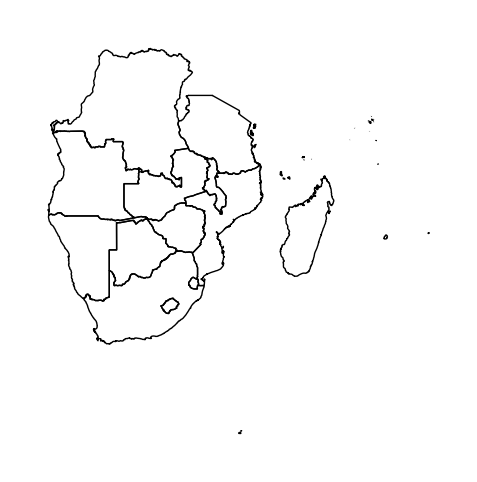

In [33]:
gplt.polyplot(sadcData);

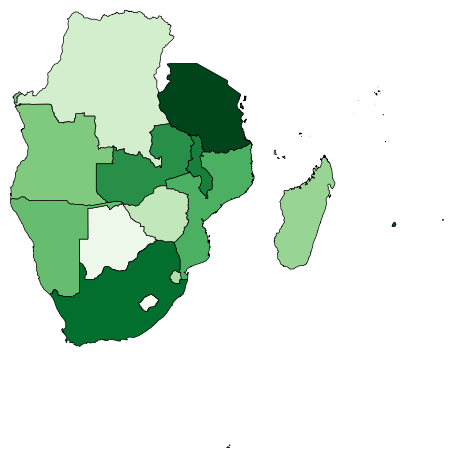

In [34]:
fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_smape_1", 
    linewidth=.5,
    cmap='Greens',
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_smape_1.pdf', dpi = 600)
plt.show()

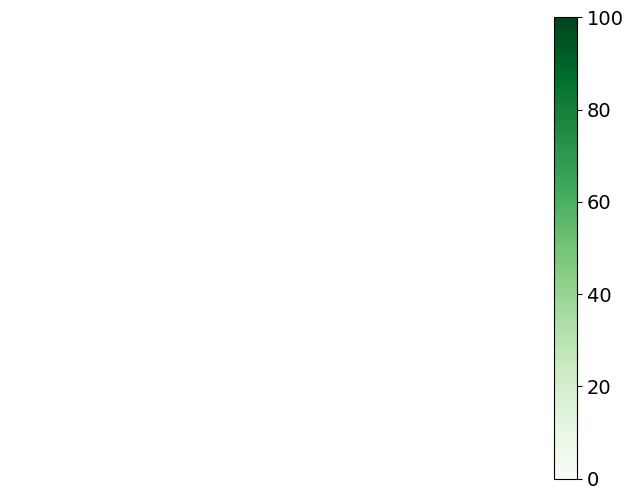

In [35]:
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_cases_smape_1_legend.pdf', dpi = 600)

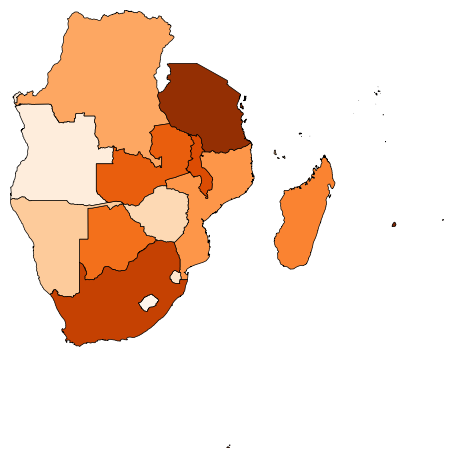

In [36]:
fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_smape_1", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_smape_1.pdf', dpi = 600)
plt.show()

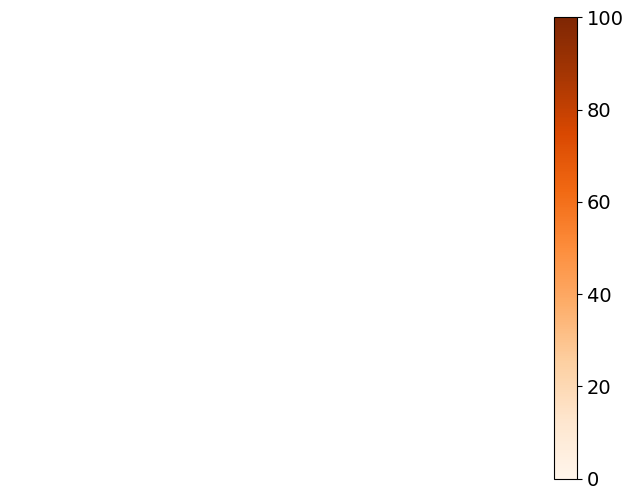

In [37]:
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
# create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_deaths_smape_1_legend.pdf', dpi = 600)

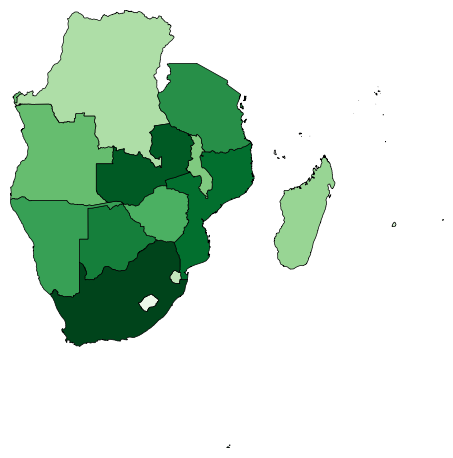

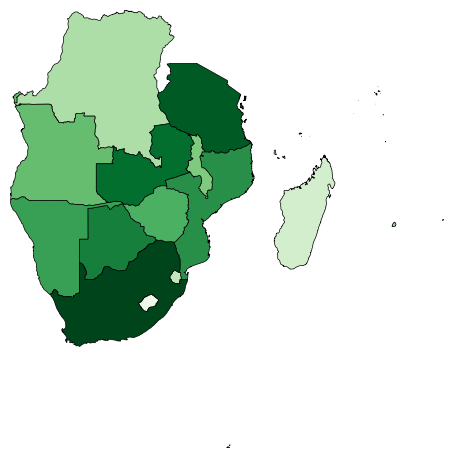

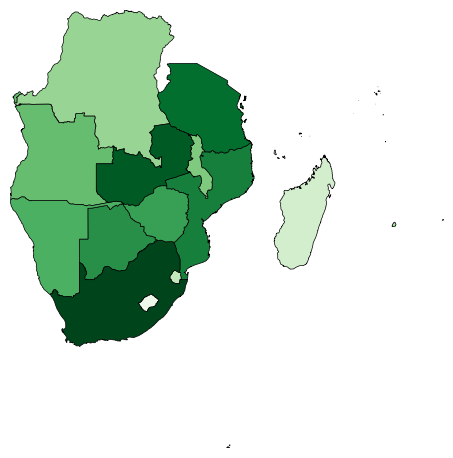

In [38]:
# MIS cases

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_2", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_2.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_05", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_1", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_1.pdf', dpi = 600)
plt.show()

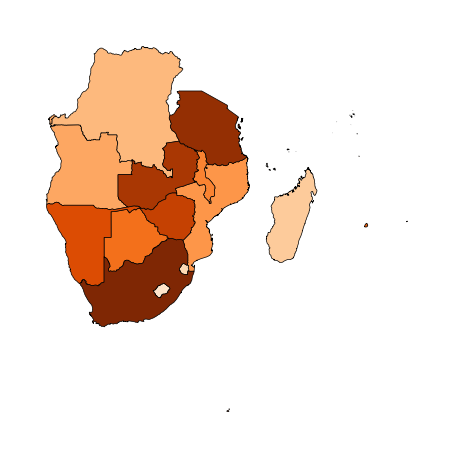

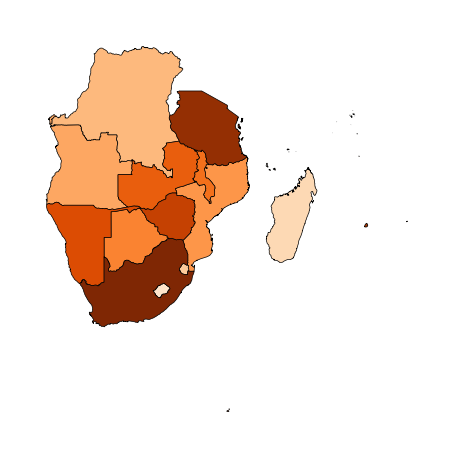

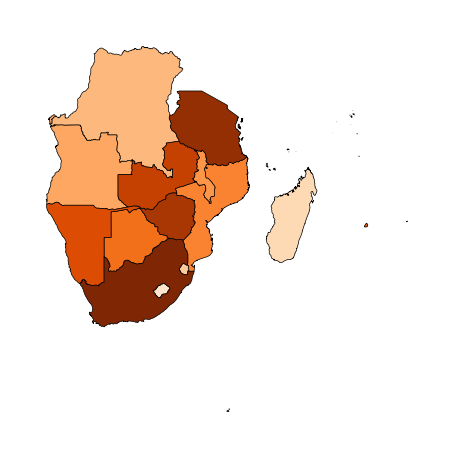

In [39]:
# MIS deaths

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_2", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_2.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_05", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_1.pdf', dpi = 600)
plt.show()